In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from scipy.stats import norm, entropy
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency

In [2]:
from scipy.stats import pearsonr as pcr
from collections import Counter as counter

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
from feature_engine.encoding import (
    MeanEncoder,
    OneHotEncoder,
    CountFrequencyEncoder,
    RareLabelEncoder
)

from sklearn.pipeline import Pipeline as pipe

In [5]:
df = pd.read_csv("train.csv")

In [6]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


drop rows that are null

In [7]:
df["churn_risk_score"].unique()

array([ 2,  1,  5,  3,  4, -1], dtype=int64)

In [8]:
df = df[df["churn_risk_score"].isin([ 2.,  1.,  5.,  3.,  4.])]
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [9]:
df["churn_risk_score"].unique()

array([2, 1, 5, 3, 4], dtype=int64)

In [10]:
df.drop(columns=[ "customer_id", "referral_id", "Name"], inplace=True)

In [11]:
df.drop(columns=["last_visit_time"], inplace=True)

In [12]:
df.drop(columns=["security_no"], inplace=True)

In [13]:
df.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [14]:
def discover_categorical_and_numerical(df):
  type_dictionary = {col: ("categorical" if df[col].dtype == "O" else "numerical") for col in df.columns}
  categorical = [key for key, val in type_dictionary.items() if val == "categorical"]
  numerical = df.columns.difference(categorical)
  return categorical, numerical

In [15]:
categorical, numerical = discover_categorical_and_numerical(df)
categorical

['gender',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [16]:
numerical = numerical.to_list()

In [17]:
numerical.remove("churn_risk_score")
numerical

['age',
 'avg_time_spent',
 'avg_transaction_value',
 'days_since_last_login',
 'points_in_wallet']

In [18]:
def convert_categorical_to_numerical_forcefully(df, columns):
  for c in columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    df[c].fillna(np.mean(df[c]), inplace=True)
  return df

In [19]:
df = convert_categorical_to_numerical_forcefully(df, ["avg_frequency_login_days"])
df.head()

C:\Users\Iaine\AppData\Local\Temp\ipykernel_6176\2155302553.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(np.mean(df[c]), inplace=True)


,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [20]:
for c in categorical:
  print(f"{c}: {df[c].unique()}")

gender: ['F' 'M' 'Unknown']
region_category: ['Village' 'City' 'Town' nan]
membership_category: ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joining_date: ['2017-08-17' '2017-08-28' '2016-11-11' ... '2017-12-11' '2016-09-25'
 '2017-04-15']
joined_through_referral: ['No' '?' 'Yes']
preferred_offer_types: ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation: ['?' 'Desktop' 'Smartphone' 'Both']
internet_option: ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
avg_frequency_login_days: [17.         10.         22.         ... -9.32551114 -8.75932971
 27.83992744]
used_special_discount: ['Yes' 'No']
offer_application_preference: ['Yes' 'No']
past_complaint: ['No' 'Yes']
complaint_status: ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback: ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Q

In [21]:
for c in categorical:
  df[c].fillna("unknown", inplace=True)

C:\Users\Iaine\AppData\Local\Temp\ipykernel_6176\3116825679.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna("unknown", inplace=True)


In [22]:
for c in categorical:
  print(f"{c}: {df[c].unique()}")

gender: ['F' 'M' 'Unknown']
region_category: ['Village' 'City' 'Town' 'unknown']
membership_category: ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joining_date: ['2017-08-17' '2017-08-28' '2016-11-11' ... '2017-12-11' '2016-09-25'
 '2017-04-15']
joined_through_referral: ['No' '?' 'Yes']
preferred_offer_types: ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers'
 'unknown']
medium_of_operation: ['?' 'Desktop' 'Smartphone' 'Both']
internet_option: ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
avg_frequency_login_days: [17.         10.         22.         ... -9.32551114 -8.75932971
 27.83992744]
used_special_discount: ['Yes' 'No']
offer_application_preference: ['Yes' 'No']
past_complaint: ['No' 'Yes']
complaint_status: ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback: ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'P

In [23]:
ohe_cols = ["gender", "joined_through_referral", "used_special_discount", "offer_application_preference", "past_complaint"]
other_categorical = [c for c in categorical if c not in ohe_cols and c!= "avg_frequency_login_days"]

In [24]:
categorical = ohe_cols + other_categorical
numerical = [n for n in df.columns if n not in categorical and n != "churn_risk_score"]

In [25]:
def frequency_encoding(df, columns):
  list_freq_dict = {}
  for c in columns:
    freq_dict = df.groupby([c]).size().to_dict() 
    df[f"per_{c}"] = df[c].map(freq_dict)
    list_freq_dict[c] = freq_dict
  return df, list_freq_dict

In [26]:
def probability_encoding(df, columns):
  list_freq_dict = {}
  for c in columns:
    freq_dict = df.groupby([c]).size().to_dict() / df.sum()
    df[f"per_{c}"] = df[c].map(freq_dict)
    list_freq_dict[c] = freq_dict
  return df, list_freq_dict

In [27]:
df, list_frq_dict = frequency_encoding(df, other_categorical)

In [28]:
list_frq_dict

{'region_category': {'City': 12315,
  'Town': 13702,
  'Village': 4549,
  'unknown': 5263},
 'membership_category': {'Basic Membership': 7473,
  'Gold Membership': 6574,
  'No Membership': 7466,
  'Platinum Membership': 4202,
  'Premium Membership': 4308,
  'Silver Membership': 5806},
 'joining_date': {'2015-01-01': 25,
  '2015-01-02': 29,
  '2015-01-03': 36,
  '2015-01-04': 35,
  '2015-01-05': 44,
  '2015-01-06': 34,
  '2015-01-07': 30,
  '2015-01-08': 31,
  '2015-01-09': 33,
  '2015-01-10': 35,
  '2015-01-11': 33,
  '2015-01-12': 37,
  '2015-01-13': 42,
  '2015-01-14': 34,
  '2015-01-15': 46,
  '2015-01-16': 34,
  '2015-01-17': 27,
  '2015-01-18': 27,
  '2015-01-19': 35,
  '2015-01-20': 34,
  '2015-01-21': 29,
  '2015-01-22': 31,
  '2015-01-23': 32,
  '2015-01-24': 27,
  '2015-01-25': 37,
  '2015-01-26': 38,
  '2015-01-27': 33,
  '2015-01-28': 27,
  '2015-01-29': 35,
  '2015-01-30': 43,
  '2015-01-31': 32,
  '2015-02-01': 28,
  '2015-02-02': 29,
  '2015-02-03': 26,
  '2015-02-04': 34

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
# Assuming df is your DataFrame and 'target' is the column with the labels

# Prepare Data
x = df.drop('churn_risk_score', axis=1)  # Removes the target column, keeps all others
y = df['churn_risk_score']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)

In [31]:
x_train_categorical = x_train[categorical]
x_val_categorical = x_val[categorical]

In [32]:
x_train_numerical = x_train[numerical]
x_val_numerical = x_val[numerical]

other_categorical

['region_category',
 'membership_category',
 'joining_date',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'complaint_status',
 'feedback']

LATER !!

In [33]:
categorical

['gender',
 'joined_through_referral',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'region_category',
 'membership_category',
 'joining_date',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'complaint_status',
 'feedback']

In [34]:
df.to_csv("./cleaned_data.csv")

In [35]:
# set up the pipeline
fe_pipe = pipe([
    # encode categorical and discrete variables using the target mean
    ('categorical_encoder', MeanEncoder(variables=other_categorical, smoothing="auto", unseen='encode', missing_values='ignore')),
    ('onehot_encoder', OneHotEncoder(top_categories=3,
                                     variables=["gender", "joined_through_referral",
                                                "used_special_discount", "offer_application_preference",
                                                "past_complaint"],
                                     drop_last=True))
  ])



Only run once!

In [36]:
fe_pipe.fit(x_train_categorical, y_train)

Pipeline(steps=[('categorical_encoder',
                 MeanEncoder(missing_values='ignore', smoothing='auto',
                             unseen='encode',
                             variables=['region_category',
                                        'membership_category', 'joining_date',
                                        'preferred_offer_types',
                                        'medium_of_operation',
                                        'internet_option', 'complaint_status',
                                        'feedback'])),
                ('onehot_encoder',
                 OneHotEncoder(drop_last=True, top_categories=3,
                               variables=['gender', 'joined_through_referral',
                                          'used_special_discount',
                                          'offer_application_preference',
                                          'past_complaint']))])

In [37]:
t_x_train_categorical = fe_pipe.transform(x_train_categorical)
t_x_train_categorical.dtypes
x_train_numerical.dtypes

age                           int64
days_since_last_login         int64
avg_time_spent              float64
avg_transaction_value       float64
avg_frequency_login_days    float64
points_in_wallet            float64
dtype: object

Updated x_train

In [38]:
x_train = pd.concat([x_train_numerical, t_x_train_categorical], axis=1)
x_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,region_category,membership_category,joining_date,preferred_offer_types,medium_of_operation,internet_option,complaint_status,feedback,gender_F,gender_M,gender_Unknown,joined_through_referral_No,joined_through_referral_Yes,joined_through_referral_?,used_special_discount_Yes,used_special_discount_No,offer_application_preference_Yes,offer_application_preference_No,past_complaint_No,past_complaint_Yes
16421,14,11,449.20,4852.97,14.00000,601.300000,3.635015,4.658229,4.043160,3.516846,3.667754,3.613093,3.597941,3.975718,1,0,0,1,0,0,1,0,0,1,1,0
1090,11,15,91.45,69367.41,19.00000,777.710000,3.502807,2.414312,3.606392,3.713967,3.575505,3.615265,3.624658,1.533576,0,1,0,0,0,1,0,1,1,0,0,1
34214,51,-999,549.97,8524.86,13.00000,715.840000,3.626860,4.658023,3.446278,3.616292,3.575505,3.613093,3.597941,3.975718,0,1,0,0,1,0,1,0,1,0,1,0
20466,23,22,59.65,20282.44,10.00000,862.755346,3.626860,3.316926,3.505499,3.516846,3.667754,3.613093,3.650950,4.006025,1,0,0,0,1,0,1,0,0,1,0,1
19436,32,22,205.70,86808.55,15.96304,763.350000,3.626860,2.414312,3.679544,3.516846,3.575505,3.613093,3.597941,1.505297,0,1,0,1,0,0,1,0,0,1,1,0


now for the validation set

In [39]:
for c in categorical:
  print(f"{c}: {df[c].unique()}")

gender: ['F' 'M' 'Unknown']
joined_through_referral: ['No' '?' 'Yes']
used_special_discount: ['Yes' 'No']
offer_application_preference: ['Yes' 'No']
past_complaint: ['No' 'Yes']
region_category: ['Village' 'City' 'Town' 'unknown']
membership_category: ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joining_date: ['2017-08-17' '2017-08-28' '2016-11-11' ... '2017-12-11' '2016-09-25'
 '2017-04-15']
preferred_offer_types: ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers'
 'unknown']
medium_of_operation: ['?' 'Desktop' 'Smartphone' 'Both']
internet_option: ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
complaint_status: ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback: ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price']


In [40]:
for c in categorical:
  print(f"{c}: {x_train_categorical[c].unique()}")

gender: ['F' 'M' 'Unknown']
joined_through_referral: ['No' '?' 'Yes']
used_special_discount: ['Yes' 'No']
offer_application_preference: ['No' 'Yes']
past_complaint: ['No' 'Yes']
region_category: ['City' 'Village' 'Town' 'unknown']
membership_category: ['No Membership' 'Platinum Membership' 'Basic Membership'
 'Silver Membership' 'Premium Membership' 'Gold Membership']
joining_date: ['2017-03-08' '2017-12-12' '2016-01-08' ... '2016-07-21' '2015-03-04'
 '2015-05-02']
preferred_offer_types: ['Gift Vouchers/Coupons' 'Without Offers' 'Credit/Debit Card Offers'
 'unknown']
medium_of_operation: ['Smartphone' 'Desktop' 'Both' '?']
internet_option: ['Mobile_Data' 'Wi-Fi' 'Fiber_Optic']
complaint_status: ['Not Applicable' 'No Information Available' 'Solved'
 'Solved in Follow-up' 'Unsolved']
feedback: ['Poor Website' 'Quality Customer Care' 'Poor Product Quality'
 'User Friendly Website' 'Too many ads' 'Reasonable Price'
 'Poor Customer Service' 'No reason specified' 'Products always in Stock']


In [41]:
for c in categorical:
  print(f"{c}: {x_val_categorical[c].unique()}")

gender: ['F' 'M' 'Unknown']
joined_through_referral: ['Yes' '?' 'No']
used_special_discount: ['Yes' 'No']
offer_application_preference: ['No' 'Yes']
past_complaint: ['Yes' 'No']
region_category: ['City' 'Town' 'unknown' 'Village']
membership_category: ['Gold Membership' 'No Membership' 'Premium Membership'
 'Silver Membership' 'Basic Membership' 'Platinum Membership']
joining_date: ['2015-12-02' '2017-04-10' '2016-01-03' ... '2016-09-21' '2016-11-26'
 '2017-02-04']
preferred_offer_types: ['Gift Vouchers/Coupons' 'Without Offers' 'Credit/Debit Card Offers'
 'unknown']
medium_of_operation: ['?' 'Desktop' 'Smartphone' 'Both']
internet_option: ['Fiber_Optic' 'Wi-Fi' 'Mobile_Data']
complaint_status: ['Solved in Follow-up' 'Not Applicable' 'Unsolved'
 'No Information Available' 'Solved']
feedback: ['Poor Customer Service' 'Poor Website' 'Too many ads'
 'User Friendly Website' 'No reason specified' 'Poor Product Quality'
 'Reasonable Price' 'Products always in Stock' 'Quality Customer Care']


In [42]:
t_x_val_categorical = fe_pipe.transform(x_val_categorical)

Updated x_val

In [43]:
x_val = pd.concat([x_val_numerical, t_x_val_categorical], axis=1)

In [44]:
x_val.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,region_category,membership_category,joining_date,preferred_offer_types,medium_of_operation,internet_option,complaint_status,feedback,gender_F,gender_M,gender_Unknown,joined_through_referral_No,joined_through_referral_Yes,joined_through_referral_?,used_special_discount_Yes,used_special_discount_No,offer_application_preference_Yes,offer_application_preference_No,past_complaint_No,past_complaint_Yes
30925,38,11,134.50,9351.99,13.0,706.840000,3.635015,3.038074,3.988804,3.516846,3.620617,3.616708,3.648778,3.995621,1,0,0,0,1,0,1,0,0,1,0,1
36661,62,13,30.09,48568.05,12.0,338.682681,3.626860,4.658229,3.529058,3.713967,3.575505,3.615265,3.597941,3.975718,0,1,0,0,0,1,0,1,1,0,1,0
18359,29,10,266.01,48140.91,9.0,NaN,3.635015,2.399681,3.430617,3.516846,3.667754,3.613093,3.597941,3.966360,1,0,0,0,1,0,1,0,0,1,1,0
1771,63,10,263.68,21332.45,27.0,674.830000,3.626860,3.038074,3.729142,3.616292,3.667754,3.616708,3.605645,3.966360,0,1,0,0,1,0,0,1,1,0,0,1
12529,60,12,117.59,2817.81,9.0,737.270000,3.626860,3.316926,3.414093,3.616292,3.575505,3.613093,3.597941,3.975718,0,1,0,0,1,0,0,1,1,0,1,0


In [45]:
from sklearn.metrics import accuracy_score

In [46]:
# Build Decision Tree Model

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)

# Evaluate the Model
y_pred = dt_classifier.predict(x_val)
y_pred

print(classification_report(y_val, y_pred))
#print("Accuracy:", accuracy_score(y_val, y_pred))




              precision    recall  f1-score   support

           1       0.76      0.74      0.75       679
           2       0.75      0.76      0.76       685
           3       0.91      0.91      0.91      2686
           4       0.66      0.66      0.66      2505
           5       0.74      0.74      0.74      2403

    accuracy                           0.77      8958
   macro avg       0.76      0.76      0.76      8958
weighted avg       0.77      0.77      0.77      8958



In [47]:
np.unique(y_pred)

array([1, 2, 3, 4, 5], dtype=int64)

In [48]:
from sklearn.metrics import balanced_accuracy_score, f1_score, average_precision_score

In [49]:
def plot_confusion_matrix(cm, labels):
    """
    Plots a confusion matrix using seaborn with annotations and a green color map.

    Args:
    cm (numpy.ndarray): The confusion matrix to plot.
    labels (list of str): The labels for the confusion matrix axes.
    """
    # Create the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)

    # Add labels and title for clarity
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()

In [50]:
conf_matrix = confusion_matrix(y_val, y_pred)
conf_matrix

array([[ 504,  175,    0,    0,    0],
       [ 163,  522,    0,    0,    0],
       [   0,    0, 2441,  245,    0],
       [   0,    0,  233, 1661,  611],
       [   0,    0,    0,  628, 1775]], dtype=int64)

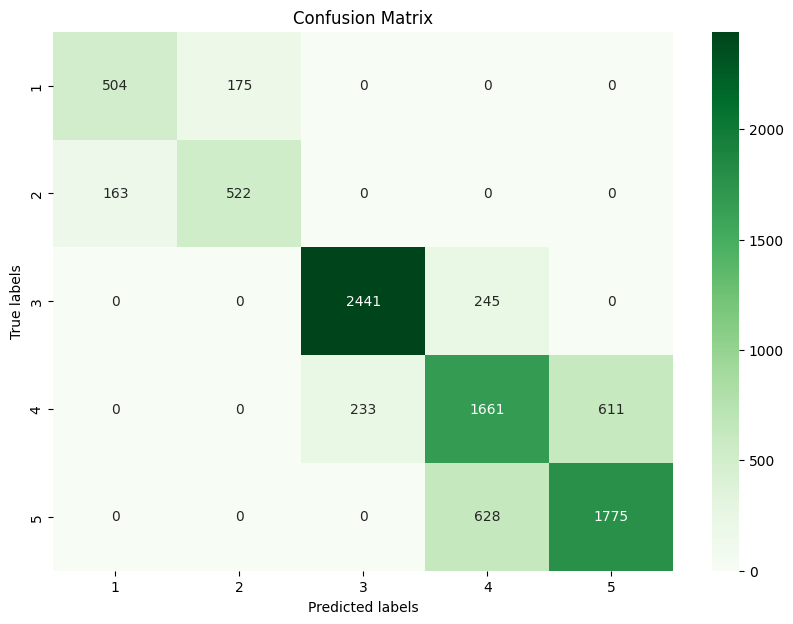

In [51]:
conf_matrix = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(conf_matrix, [1, 2, 3, 4, 5])

In [52]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_val, y_pred)
print(score)

0.7705961152042867


In [53]:
from sklearn.experimental import enable_halving_search_cv  # Explicitly require this to enable the experimental class
from sklearn.model_selection import HalvingGridSearchCV


def halving_grid_search(estimator, param_grid, x_train, y_train, scoring=None, factor=2,
                        resource='n_samples', min_resources='exhaust', aggressive_elimination=True):
    # Initialize the HalvingGridSearchCV object
    search = HalvingGridSearchCV(estimator, param_grid, scoring=scoring, factor=factor,
                                 min_resources=min_resources, aggressive_elimination=aggressive_elimination,
                                 cv=5, n_jobs=-1, refit=True)

    # Fit the halving grid search on the training data
    search.fit(x_train, y_train)

    # print results
    print(search.cv_results_)
    print(f"\nBest Score: {search.best_score_}")
    print(f"\nBest Parameters: {search.best_params_}")
    # Return the fitted search object
    return search

In [54]:
estimator = DecisionTreeClassifier(random_state=100)

param_grid = {
    'max_depth': [None, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [3, 6, 9, 12, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None, 10, 20, 50, 75, 100]
}

In [55]:
halving_grid_search(estimator, param_grid, x_train, y_train, scoring=average_precision_score)

c:\Users\Iaine\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10800 fits failed out of a total of 43200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2723 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Iaine\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Iaine\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Iaine\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn

KeyboardInterrupt: 

In [56]:
# Build Decision Tree Model
dt2 = DecisionTreeClassifier(criterion='gini', max_depth=15,
                                       max_features='sqrt', max_leaf_nodes=75,
                                       min_samples_leaf=3, min_samples_split=10,
                                       random_state=100)
dt2.fit(x_train, y_train)

# Evaluate the Model
y_pred = dt2.predict(x_val)
y_pred

array([3, 5, 3, ..., 5, 5, 5], dtype=int64)

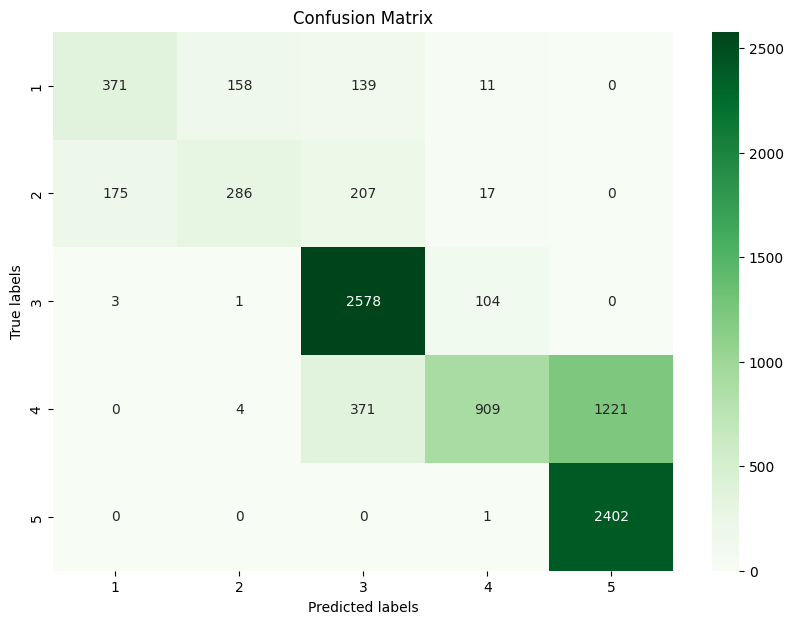

In [73]:
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm, [1, 2, 3, 4, 5])

Correlations

In [58]:
train = pd.concat([x_train, y_train], axis=1)
train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,region_category,membership_category,joining_date,preferred_offer_types,medium_of_operation,internet_option,complaint_status,feedback,gender_F,gender_M,gender_Unknown,joined_through_referral_No,joined_through_referral_Yes,joined_through_referral_?,used_special_discount_Yes,used_special_discount_No,offer_application_preference_Yes,offer_application_preference_No,past_complaint_No,past_complaint_Yes,churn_risk_score
16421,14,11,449.20,4852.97,14.00000,601.300000,3.635015,4.658229,4.043160,3.516846,3.667754,3.613093,3.597941,3.975718,1,0,0,1,0,0,1,0,0,1,1,0,4
1090,11,15,91.45,69367.41,19.00000,777.710000,3.502807,2.414312,3.606392,3.713967,3.575505,3.615265,3.624658,1.533576,0,1,0,0,0,1,0,1,1,0,0,1,1
34214,51,-999,549.97,8524.86,13.00000,715.840000,3.626860,4.658023,3.446278,3.616292,3.575505,3.613093,3.597941,3.975718,0,1,0,0,1,0,1,0,1,0,1,0,4
20466,23,22,59.65,20282.44,10.00000,862.755346,3.626860,3.316926,3.505499,3.516846,3.667754,3.613093,3.650950,4.006025,1,0,0,0,1,0,1,0,0,1,0,1,4
19436,32,22,205.70,86808.55,15.96304,763.350000,3.626860,2.414312,3.679544,3.516846,3.575505,3.613093,3.597941,1.505297,0,1,0,1,0,0,1,0,0,1,1,0,1


In [59]:
corr = train.corr()
corr = abs(corr['churn_risk_score']).sort_values(ascending=False).to_frame()
corr

,churn_risk_score
churn_risk_score,1.000000
membership_category,0.795290
feedback,0.751762
avg_transaction_value,0.362778
points_in_wallet,0.324315
joining_date,0.198858
avg_frequency_login_days,0.198013
preferred_offer_types,0.068138
joined_through_referral_No,0.056193
joined_through_referral_Yes,0.052094


Visualize Correlations

<Axes: >

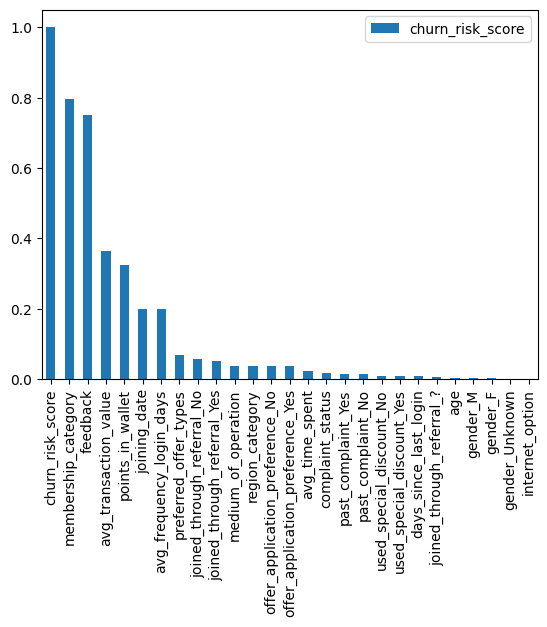

In [60]:
corr.plot(kind="bar")

Feature Importance

In [62]:
dt_imp_df = pd.DataFrame(
    {
        'feature': x_train.columns.values.tolist(),
        'importance': dt2.feature_importances_
    }
).sort_values(by='importance', ascending=False)
dt_imp_df

,feature,importance
7,membership_category,0.554948
5,points_in_wallet,0.219746
3,avg_transaction_value,0.107357
13,feedback,0.088120
4,avg_frequency_login_days,0.016254
8,joining_date,0.008761
0,age,0.001163
2,avg_time_spent,0.001050
22,offer_application_preference_Yes,0.000676
1,days_since_last_login,0.000561


Visualize feature importances

C:\Users\Iaine\AppData\Local\Temp\ipykernel_6176\3533585262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=dt_imp_df, palette='viridis')


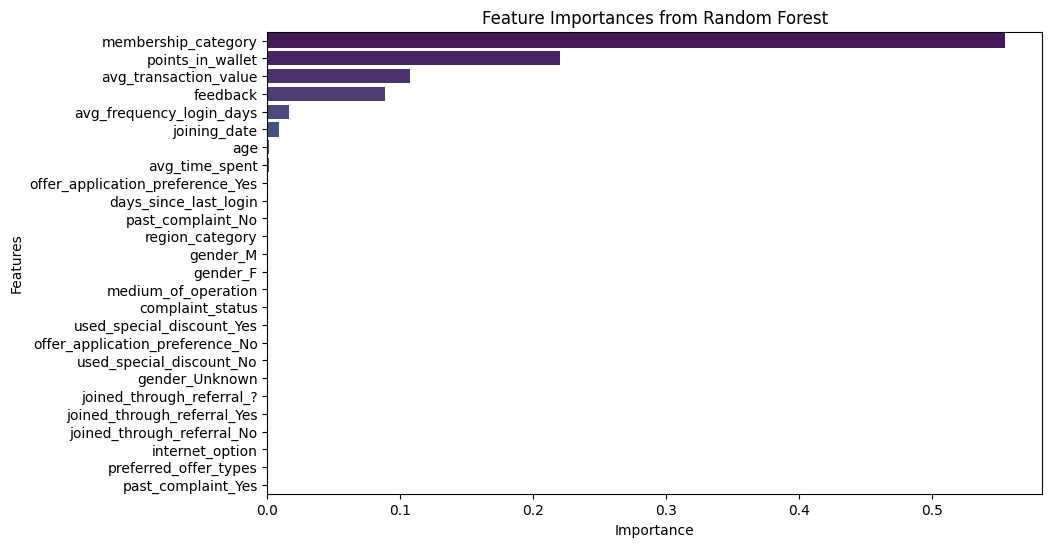

In [63]:
plt.figure(figsize=(10, 6))

sns.barplot(x='importance', y='feature', data=dt_imp_df, palette='viridis')

# Add plot labels and title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.show()

Visualizing the tree structures

In [64]:
model = dt2

# Get the decision path for the first sample
node_indicator = model.decision_path(x_val)
# Extract the path indices for the first sample
sample_id = 0  # Change this to other indices if you want to check other samples
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:node_indicator.indptr[sample_id + 1]]

print("The decision path for the sample includes the following nodes:")

for node_id in node_index:
    if model.tree_.feature[node_id] != -2:  # Check if it's not a leaf node
        # For non-leaf nodes, display the decision rule
        print(f"Node {node_id}: go to node {node_id + 1} if X[:, {model.tree_.feature[node_id]}] <= {model.tree_.threshold[node_id]:.2f}")
    else:
        # For leaf nodes, display the predicted class
        print(f"Node {node_id}: leaf node, predicted class = {model.classes_[np.argmax(model.tree_.value[node_id])]}")

The decision path for the sample includes the following nodes:
Node 0: go to node 1 if X[:, 7] <= 3.99
Node 1: go to node 2 if X[:, 8] <= 3.55
Node 4: go to node 5 if X[:, 7] <= 2.73
Node 8: go to node 9 if X[:, 4] <= 4.12
Node 20: go to node 21 if X[:, 3] <= 50027.35
Node 21: go to node 22 if X[:, 5] <= 700.07
Node 24: go to node 25 if X[:, 4] <= 19.50
Node 29: leaf node, predicted class = 3


In [66]:
def plot_decision_path(tree, sample_data):
    node_indicator = tree.decision_path(sample_data)
    path = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

    plt.figure(figsize=(20,10))
    decision_plot = plot_tree(tree, filled=True, rounded=True, class_names=tree.classes_)

    # Highlight the nodes that the first sample passes through
    for n, node in enumerate(decision_plot):
        if n in path:
            # Change the node's properties (e.g., fill color)
            node.set_fillcolor('#ffd700')

    plt.show()

In [67]:
!pip install graphviz

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [68]:
import graphviz

In [69]:
from sklearn.tree import export_graphviz, plot_tree

[Text(0.6464315878378378, 0.9615384615384616, 'x[7] <= 3.987\ngini = 0.748\nsamples = 26871\nvalue = [1973.0, 2056.0, 7738.0, 7680.0, 7424.0]'),
 Text(0.3807010135135135, 0.8846153846153846, 'x[8] <= 3.546\ngini = 0.66\nsamples = 15591\nvalue = [1973.0, 2056.0, 7738.0, 3824.0, 0.0]'),
 Text(0.13513513513513514, 0.8076923076923077, 'x[3] <= 50012.955\ngini = 0.676\nsamples = 6483\nvalue = [1077, 979, 3133, 1294, 0]'),
 Text(0.05405405405405406, 0.7307692307692307, 'x[7] <= 2.726\ngini = 0.593\nsamples = 5425\nvalue = [513.0, 485.0, 3133.0, 1294.0, 0.0]'),
 Text(0.02702702702702703, 0.6538461538461539, 'x[5] <= 800.21\ngini = 0.434\nsamples = 2142\nvalue = [346, 240, 1556, 0, 0]'),
 Text(0.013513513513513514, 0.5769230769230769, 'gini = 0.367\nsamples = 1840\nvalue = [186, 219, 1435, 0, 0]'),
 Text(0.04054054054054054, 0.5769230769230769, 'x[5] <= 860.29\ngini = 0.554\nsamples = 302\nvalue = [160, 21, 121, 0, 0]'),
 Text(0.02702702702702703, 0.5, 'gini = 0.016\nsamples = 128\nvalue = [12

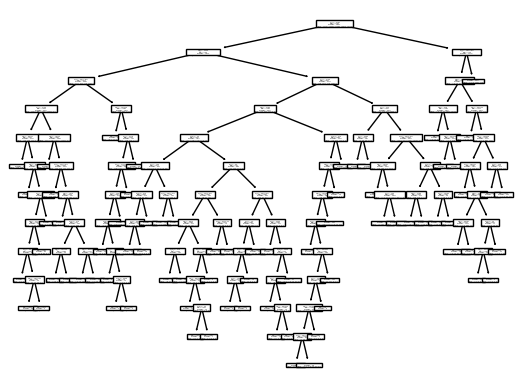

In [70]:
plot_tree(dt2)

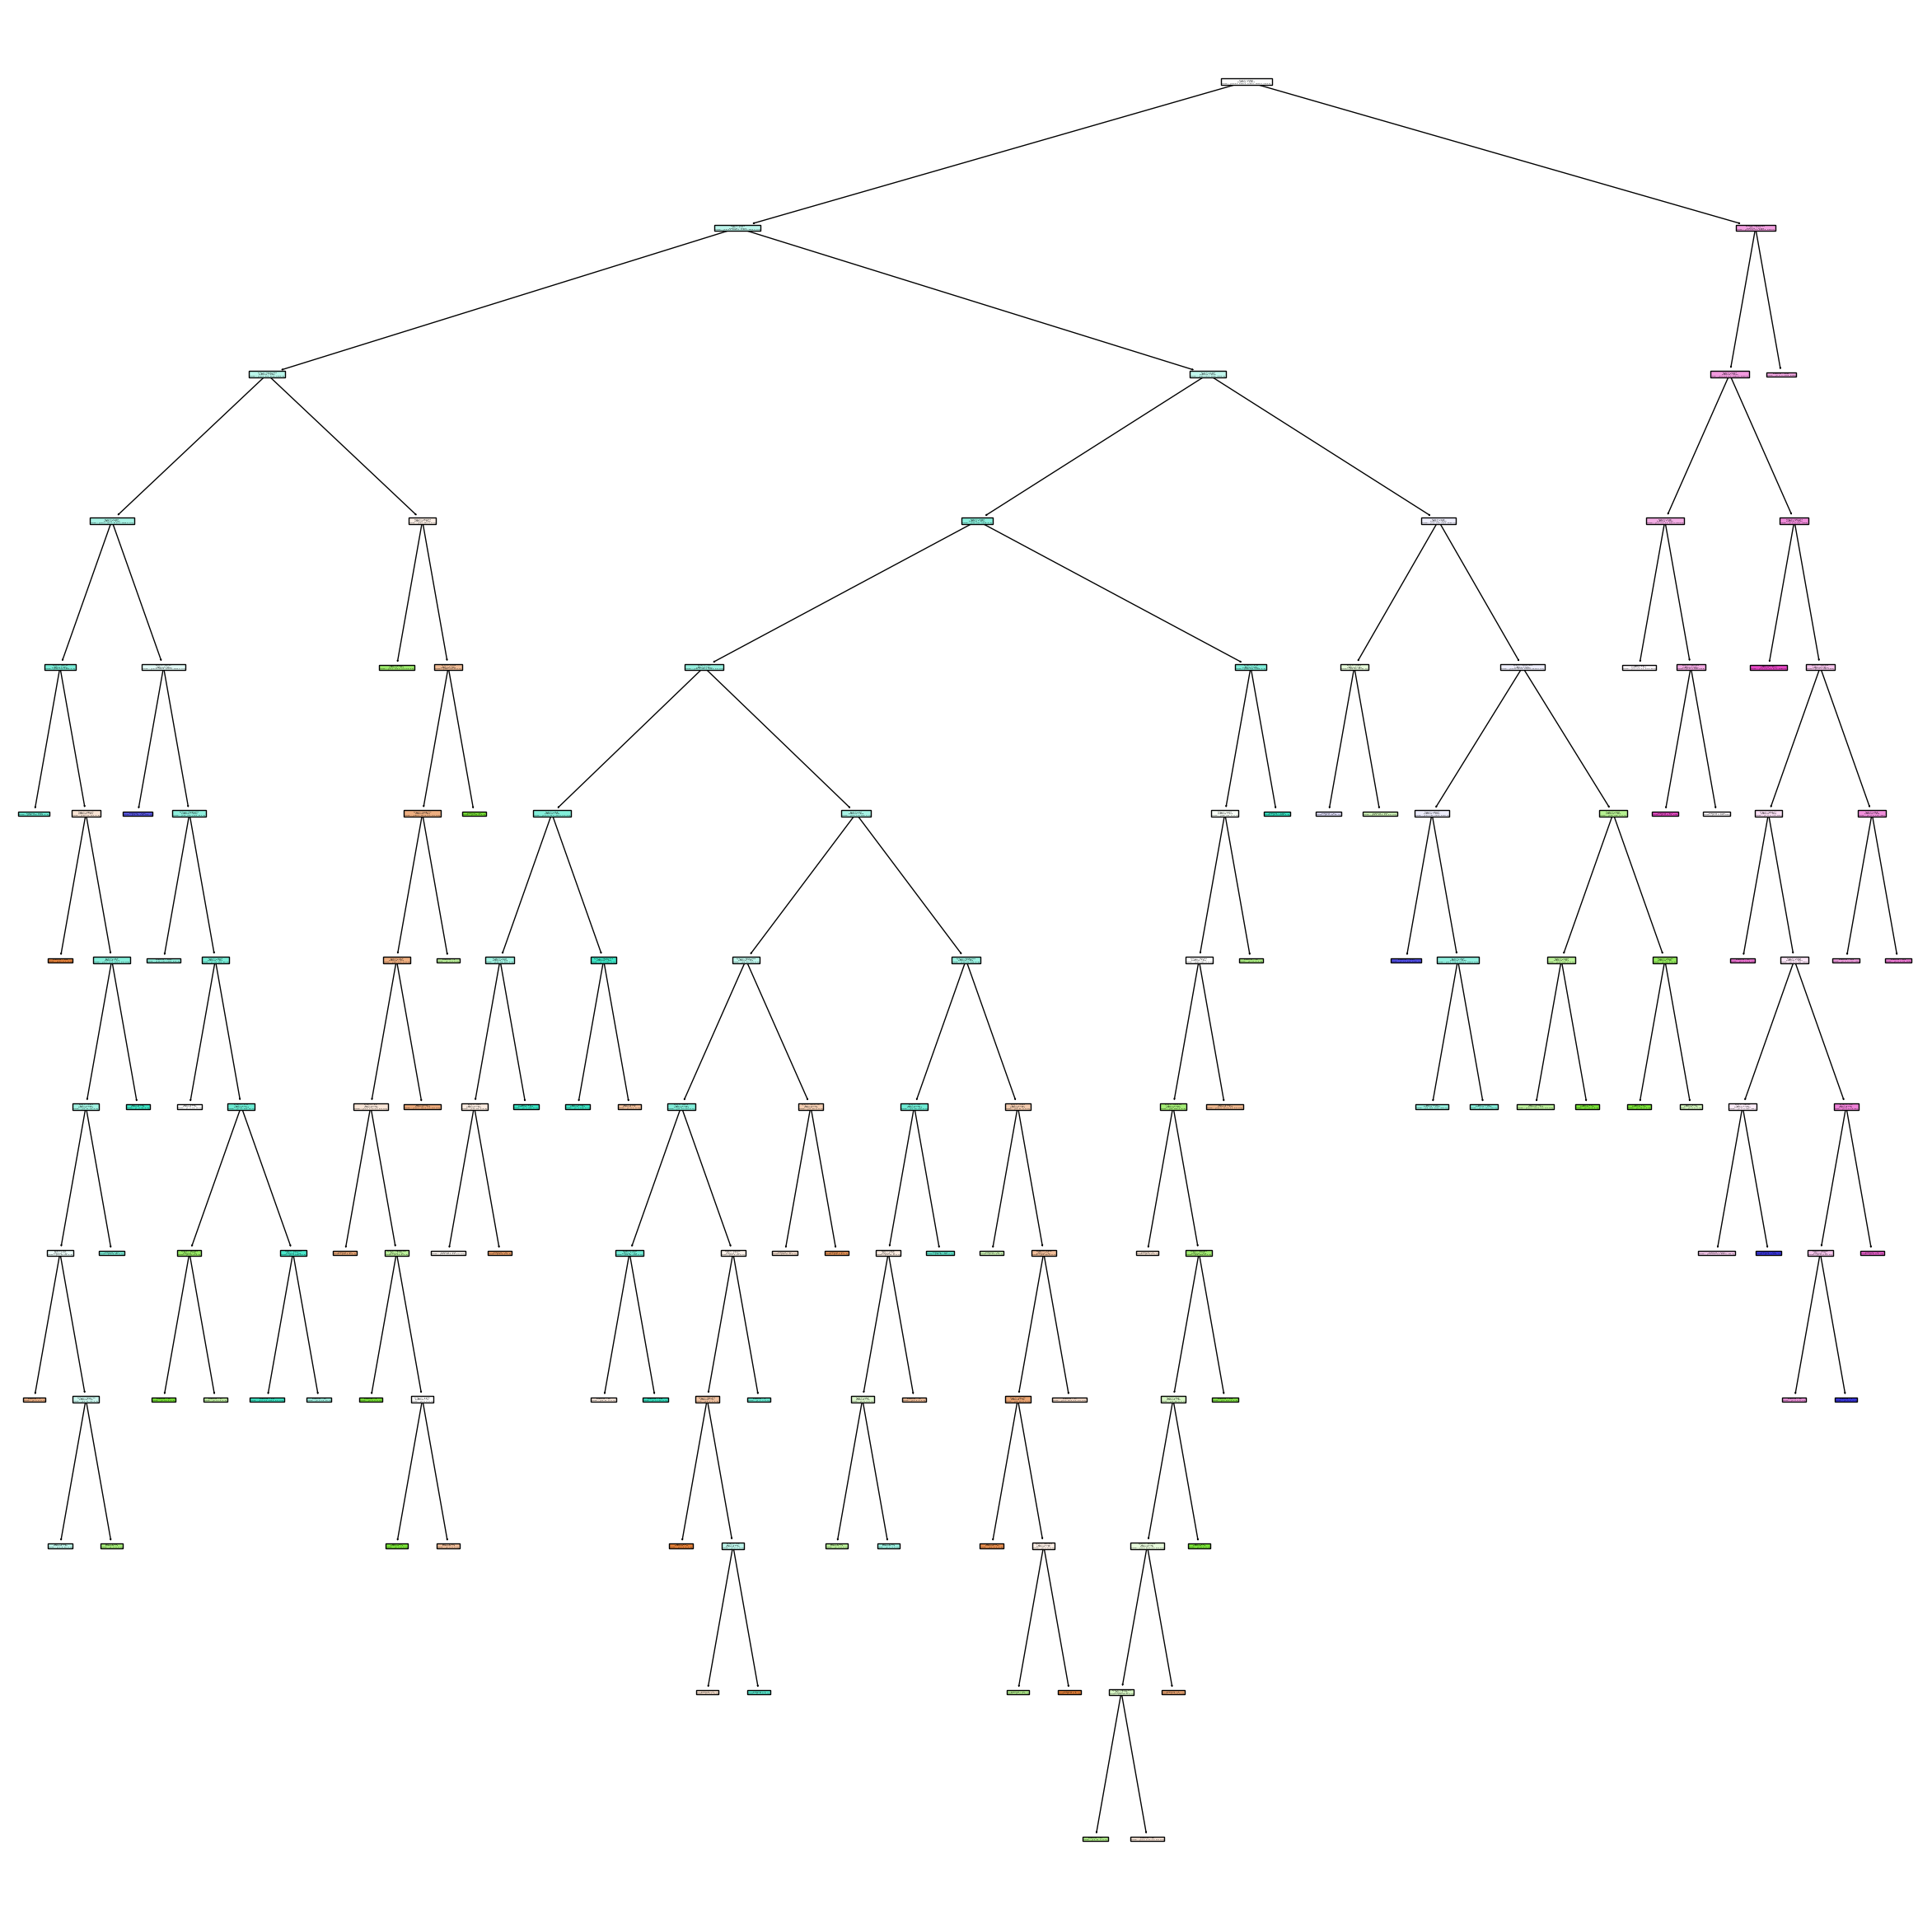

In [71]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (30, 30))

plot_tree(dt2, filled = True)
plt.show()
fig.savefig('./tree.png')

Ignore the code below for now

In [ ]:
.style.format({'RMSE_train': '{:.2f}', 'RMSE_test': '{:.2f}',
     'R2_test': '{:.3f}'}
).background_gradient(
    cmap='viridis_r', low=0.1, high=1,
    subset=['RMSE_train', 'RMSE_test']

In [ ]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")